# 视差法测量昴星团的距离

In [14]:
import numpy as np
from yt.units import *
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

## 地球轨道参数

Julian Date of Vernal Equinox at 2000: 2451623.815972

Julian Date of Perihelion at 2000 : 2451546.708333

Earth Orbital Period : 365.25 days

Earth Obliquity : 23.44 deg

Orbit eccentricity : 0.0167

首先，我们希望知道，给定时间 $T$，地球在黄道面上的位置，为此我们以黄道面为坐标平面，太阳为坐标原点，地球轨道的长轴为$x$轴，地球近日点处 $x=a(1-e)>0$，这里 $a=1$ AU 是轨道半长轴，$e=0.0167$ 是轨道离心率

In [10]:
a = AU
e = 0.0167

对于偏近点角 $\psi$，我们知道

$$
\psi-e\sin\psi=\frac{2\pi}{P} (T-T_P)
$$

这里的 $T_P$ 是地球过近日点的时刻，可以取为 $2451546.708333$ d，$P=365.25$ d 则是一个恒星年

In [47]:
TP = 2451546.708333 * day
P = 365.25 * day

虽然无法用 $T$ 解析地表示出 $\psi$，但原则上依然可以用简单的几何关系得到地球的坐标

$$
x=a(\cos\psi(T)-e),\quad y=a\sqrt{1-e^2}\sin\psi(T)
$$

如图

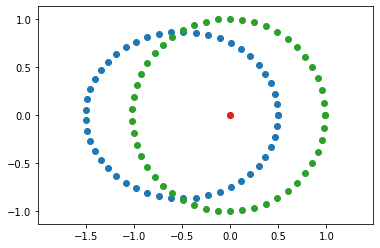

In [44]:
def psi_t(t, T0=0):
    theta = t * np.pi * 2 / P
    Psi = lambda psi: psi - e * np.sin(psi) - theta
    return fsolve(Psi, [theta])

def test_psi(e=0.0167):
    T_test = np.linspace(0, P, 50)
    psi = np.array([])
    for t in T_test:
        psi = np.append(psi, psi_t(t))
    X = a * (np.cos(psi) - e)
    Y = a * (np.sqrt(1 - e**2) * np.sin(psi))
    plt.scatter(X, Y)
    plt.axis('equal')
    plt.scatter([0],[0])
test_psi(e=0.5)
test_psi()

##  黄道坐标与赤道坐标的转化

由于黄赤交角 ($E=23.44$ deg) 的存在，赤道面和黄道面是不重合的。我们对恒星视差的测量在赤道坐标系中进行，因此，我们有必要将地球在黄道面上的位置转化为太阳在赤道坐标上的位置。

一个重要的参数是在黄道坐标系中，近日点处地球的方向与春分点处的夹角 $\Delta$ (春分点处的真近点角)。给定两者的时间差 $\Delta T$ 之后，首先可以计算出春分点处地球的坐标 $(x(\Delta T),y(\Delta T))$，从而求出对应的真近点角。

In [51]:
E = 23.44 * degree
TE = 2451623.815972*day
DeltaT = TE-TP
xE = a * (np.cos(psi_t(DeltaT)) - e)
yE = a * (np.sqrt(1 - e**2) * np.sin(psi_t(DeltaT)))
Delta = np.arctan2(yE, xE)
Delta/np.pi*180

[77.86523795] dimensionless

从而我们可以将每个 $(x,y)$ 旋转 $-\Delta$，得到同样在黄道平面上，但以子午线为 $x$ 轴，春分点 $x_E>0$ 的坐标系下的坐标 $(x',y')$

$$
x' = x\cos \Delta+y\sin\Delta,\quad y'=-x\sin\Delta +y\cos\Delta
$$

再将 $(-x',-y',0)$ 绕 $x'$ 轴旋转 $-E$，最终得到 $T$ 时刻太阳在赤道坐标系中的位置 $(x_S,y_E,z_E)$

$$
x_E=-x'\cos E,\quad y_E=-y',\quad z_E=x'\sin E
$$

In [52]:
T_test = np.linspace(0, P, 50)
psi = np.array([])
for t in T_test:
    psi = np.append(psi, psi_t(t))
X = a * (np.cos(psi) - e)
Y = a * (np.sqrt(1 - e**2) * np.sin(psi))
XE = -(X*np.cos(Delta)+Y*np.sin(Delta)) * np.cos(E)
YE = -(-X*np.sin(Delta)+Y*np.cos(Delta))
ZE = (X*np.cos(Delta)+Y*np.sin(Delta)) * np.sin(E)

In [53]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0, 'Z')

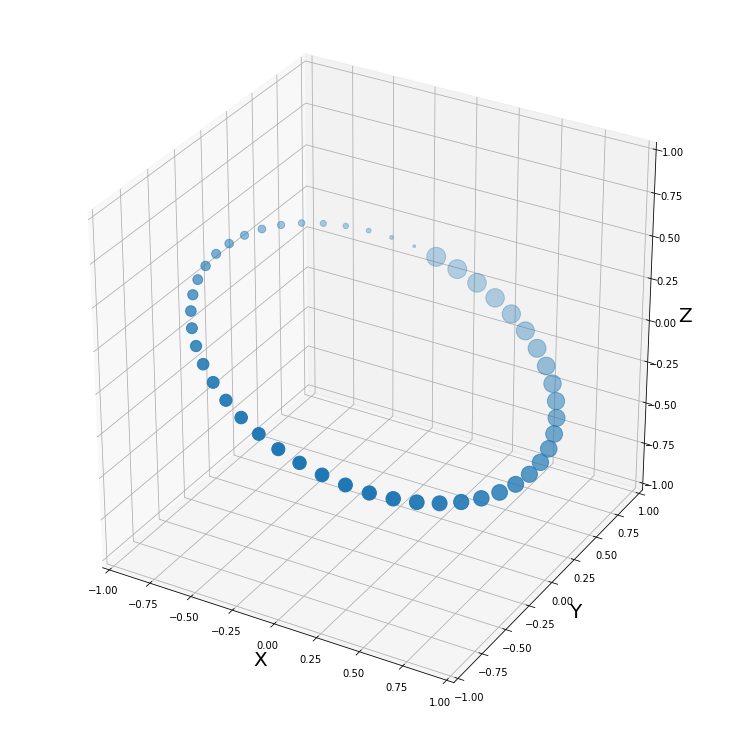

In [70]:
f, ax = plt.subplots(figsize=(10, 10))
ax = Axes3D(f)
ax.scatter3D(XE, YE, ZE, s=T_test/day)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('Z', fontsize=20)

YTArray([ 1.76556778,  1.88870959,  2.01345531,  2.14027124,  2.26951038,
          2.40137448,  2.53587816,  2.67282201,  2.81178323,  2.95213204,
          3.09307773, -3.04944385, -2.90994077, -2.77238896, -2.63741975,
         -2.5054608 , -2.37672137, -2.25120244, -2.1287235 , -2.00895713,
         -1.89146454, -1.77572772, -1.66117663, -1.54721129, -1.43322022,
         -1.31859693, -1.20275648, -1.08515413, -0.96530749, -0.84282313,
         -0.71742705, -0.58899668, -0.4575897 , -0.32346299, -0.18707381,
         -0.04905686,  0.08982484,  0.22875077,  0.36692436,  0.50365076,
          0.63839751,  0.7708303 ,  0.90082269,  1.02844439,  1.15393524,
          1.2776724 ,  1.40013609,  1.52187701,  1.64348636,  1.76556778]) (dimensionless)

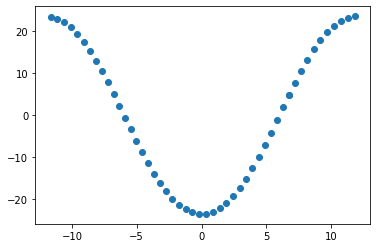

In [75]:
RaS = np.arctan2(YE, XE)
DecS = np.arctan2(ZE, YE/np.sin(RaS))
plt.scatter(RaS/np.pi*12, DecS/np.pi*180)
RaS

In [ ]:
ds = 

## 视差的计算

In [3]:
raw = np.loadtxt('hii_625.txt')
t = raw[:, 0]
Ra_h = raw[0, 1]
Ra_m = raw[0, 2]
Ra_s = raw[:, 3]
Ra_err = raw[:, 4]
Dec_deg = raw[0, 5]
Dec_m = raw[0, 6]
Dec_s = raw[:, 7]
Dec_err = raw[:, 8]

array([0.])